# Sonnet Generation

In this Jupyter notebook, we visualize how HMMs work and generate Shakespeare sonnets


In [1]:
import os
import numpy as np
from IPython.display import HTML

from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    parse_backwards_observations,
    sample_sonnet,
    sample_backwards_sonnet,
    visualize_sparsities,
    parse_syllables
)

## Visualization of the dataset

We will be using Shakespeare's sonnets as our dataset. First, we visualize the entirety of Shakespeare as a wordcloud:

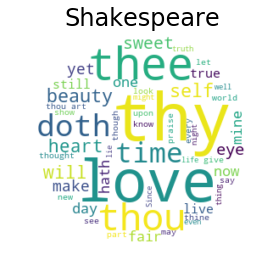

In [2]:
text = open(os.path.join(os.getcwd(), 'data_shakespeare/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Shakespeare')

# We create a dictionary of [key=word, value = # syllables] 

In [3]:

syllable_text = open(os.path.join(os.getcwd(), 'data_shakespeare/Syllable_dictionary.txt')).read()

syllable_map = parse_syllables(syllable_text)



# Training an HMM forwards


Now we train a forward HMM on our dataset. We use 10 hidden states and train over 100 iterations:

In [4]:
obs_forwards, obs_map_forwards = parse_observations(text)

hmm8_forwards = unsupervised_HMM(obs, 10, 100)
print('Sample Sonnet:\n====================')
print(sample_sonnet(hmm8_backwards, obs_map, syllable_map, 10, 14))


Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100
Sample Sonnet:
Which now or way of outworn i envy.
Luck shame gates to count how looks with i book,
Hide show what year him not are respect flies,
That my by i foes even and cries and,
Of decease my sight my than such let some.
Heart you desire since three or losing the.
Eager which 'thou constant with graciously:
Shall beauty be souls hear it then title,
Away the unstained heavenly the on.
And of still their idly in beauty's mayst,
Will love give tend not i loving from a?
They for sweetly the nor his triumphant,
Be doom the prove found bright him delight be,
I love swift the blood love's since o beauty's.



# Training an HMM backwards with rhyme 

In [5]:
obs_backwards, obs_map_backwards = parse_backwards_observations(text)
        
hmm8_backwards = unsupervised_HMM(obs, 10, 1)
print('Sample Sonnet:\n====================')
print(sample_backwards_sonnet(hmm8_backwards, obs_map, syllable_map, 10, 14, rhymes))


##  Visualizing the wordcloud of the forward HMM's states

Below, we visualize each state as a wordcloud by sampling a large emission from the state:

drawing wordclouds


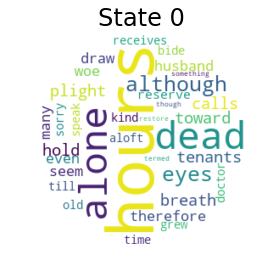

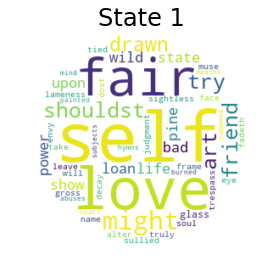

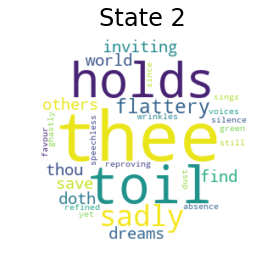

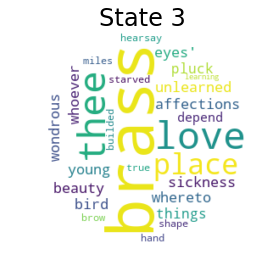

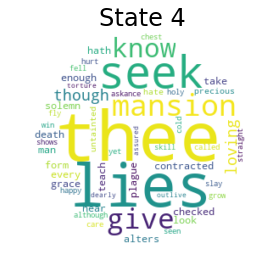

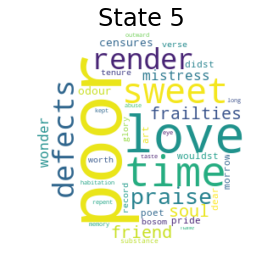

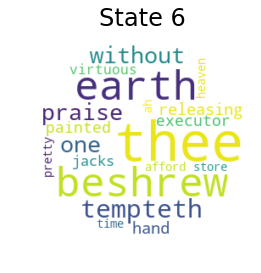

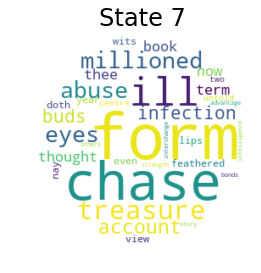

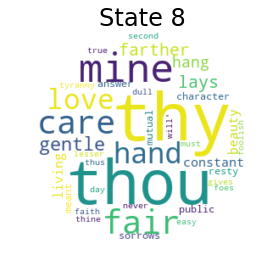

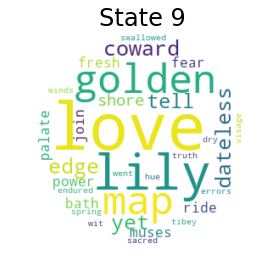

In [12]:
print("drawing wordclouds")
wordclouds = states_to_wordclouds(hmm8_forwards, obs_map_forwards, syllable_map, 10, 100,show=True)